# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")
cancer_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
cancer_df.shape

(699, 11)

In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [5]:
#cancer_df.drop(labels="ID", inplace=True, axis=1)

In [6]:
cancer_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
cancer_df.shape

(699, 11)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [8]:
# DataTypes for each column
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [9]:
#shape
cancer_df.shape

(699, 11)

In [10]:
cancer_df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [11]:
cancer_df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [12]:
cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


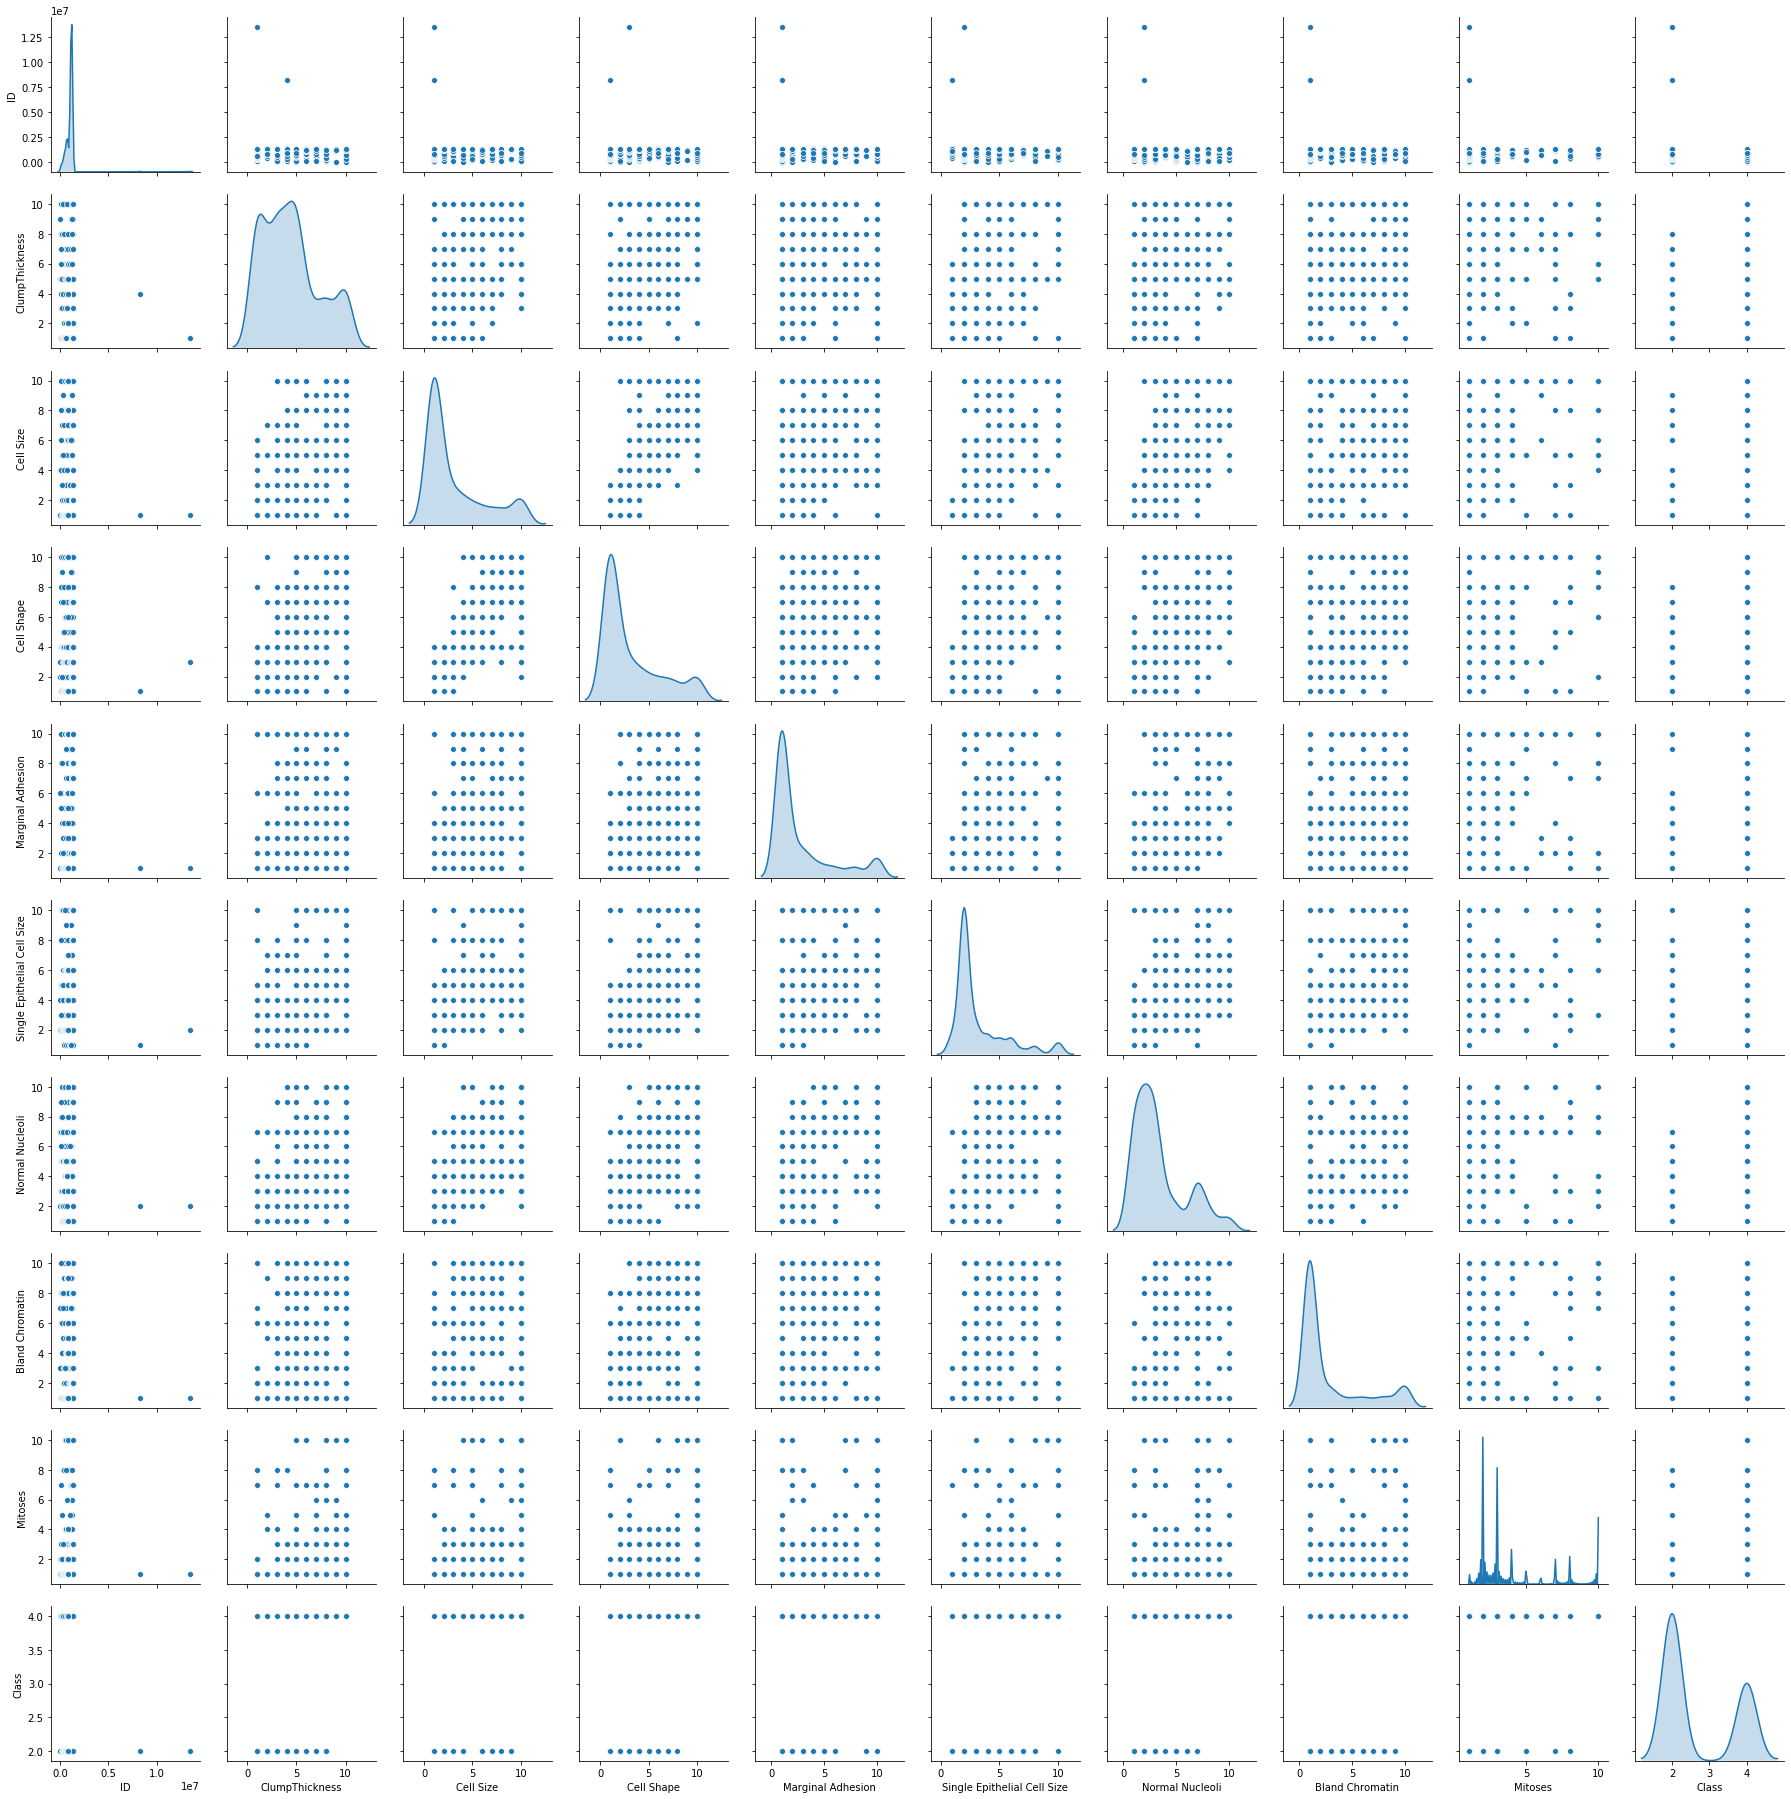

In [13]:
sns.pairplot(cancer_df,diag_kind = 'kde')

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [14]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
cancer_df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [15]:
cancer_df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [16]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
cancer_df.isin(["?"]).any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                     True
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

### "Bare Nuclei" has special character "?"

In [17]:
cancer_df["Bare Nuclei"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [18]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [19]:
import scipy.stats as stats
stats.mode(cancer_df["Bare Nuclei"])
cancer_df["Bare Nuclei"].replace(to_replace = "?", value=1, inplace = True)

C:\Users\Chandan\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [20]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [21]:
cancer_df["Bare Nuclei"] = cancer_df["Bare Nuclei"].astype('int64')

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [22]:
# Check for correlation of variable
cancer_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


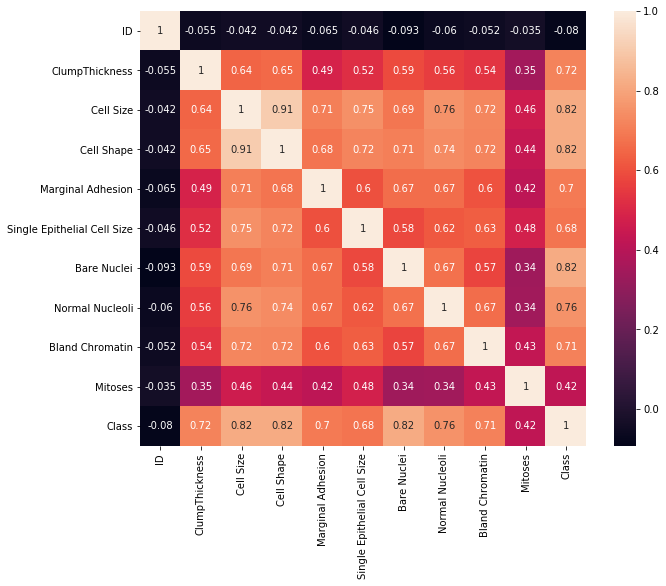

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(cancer_df.corr(),annot=True)

In [24]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

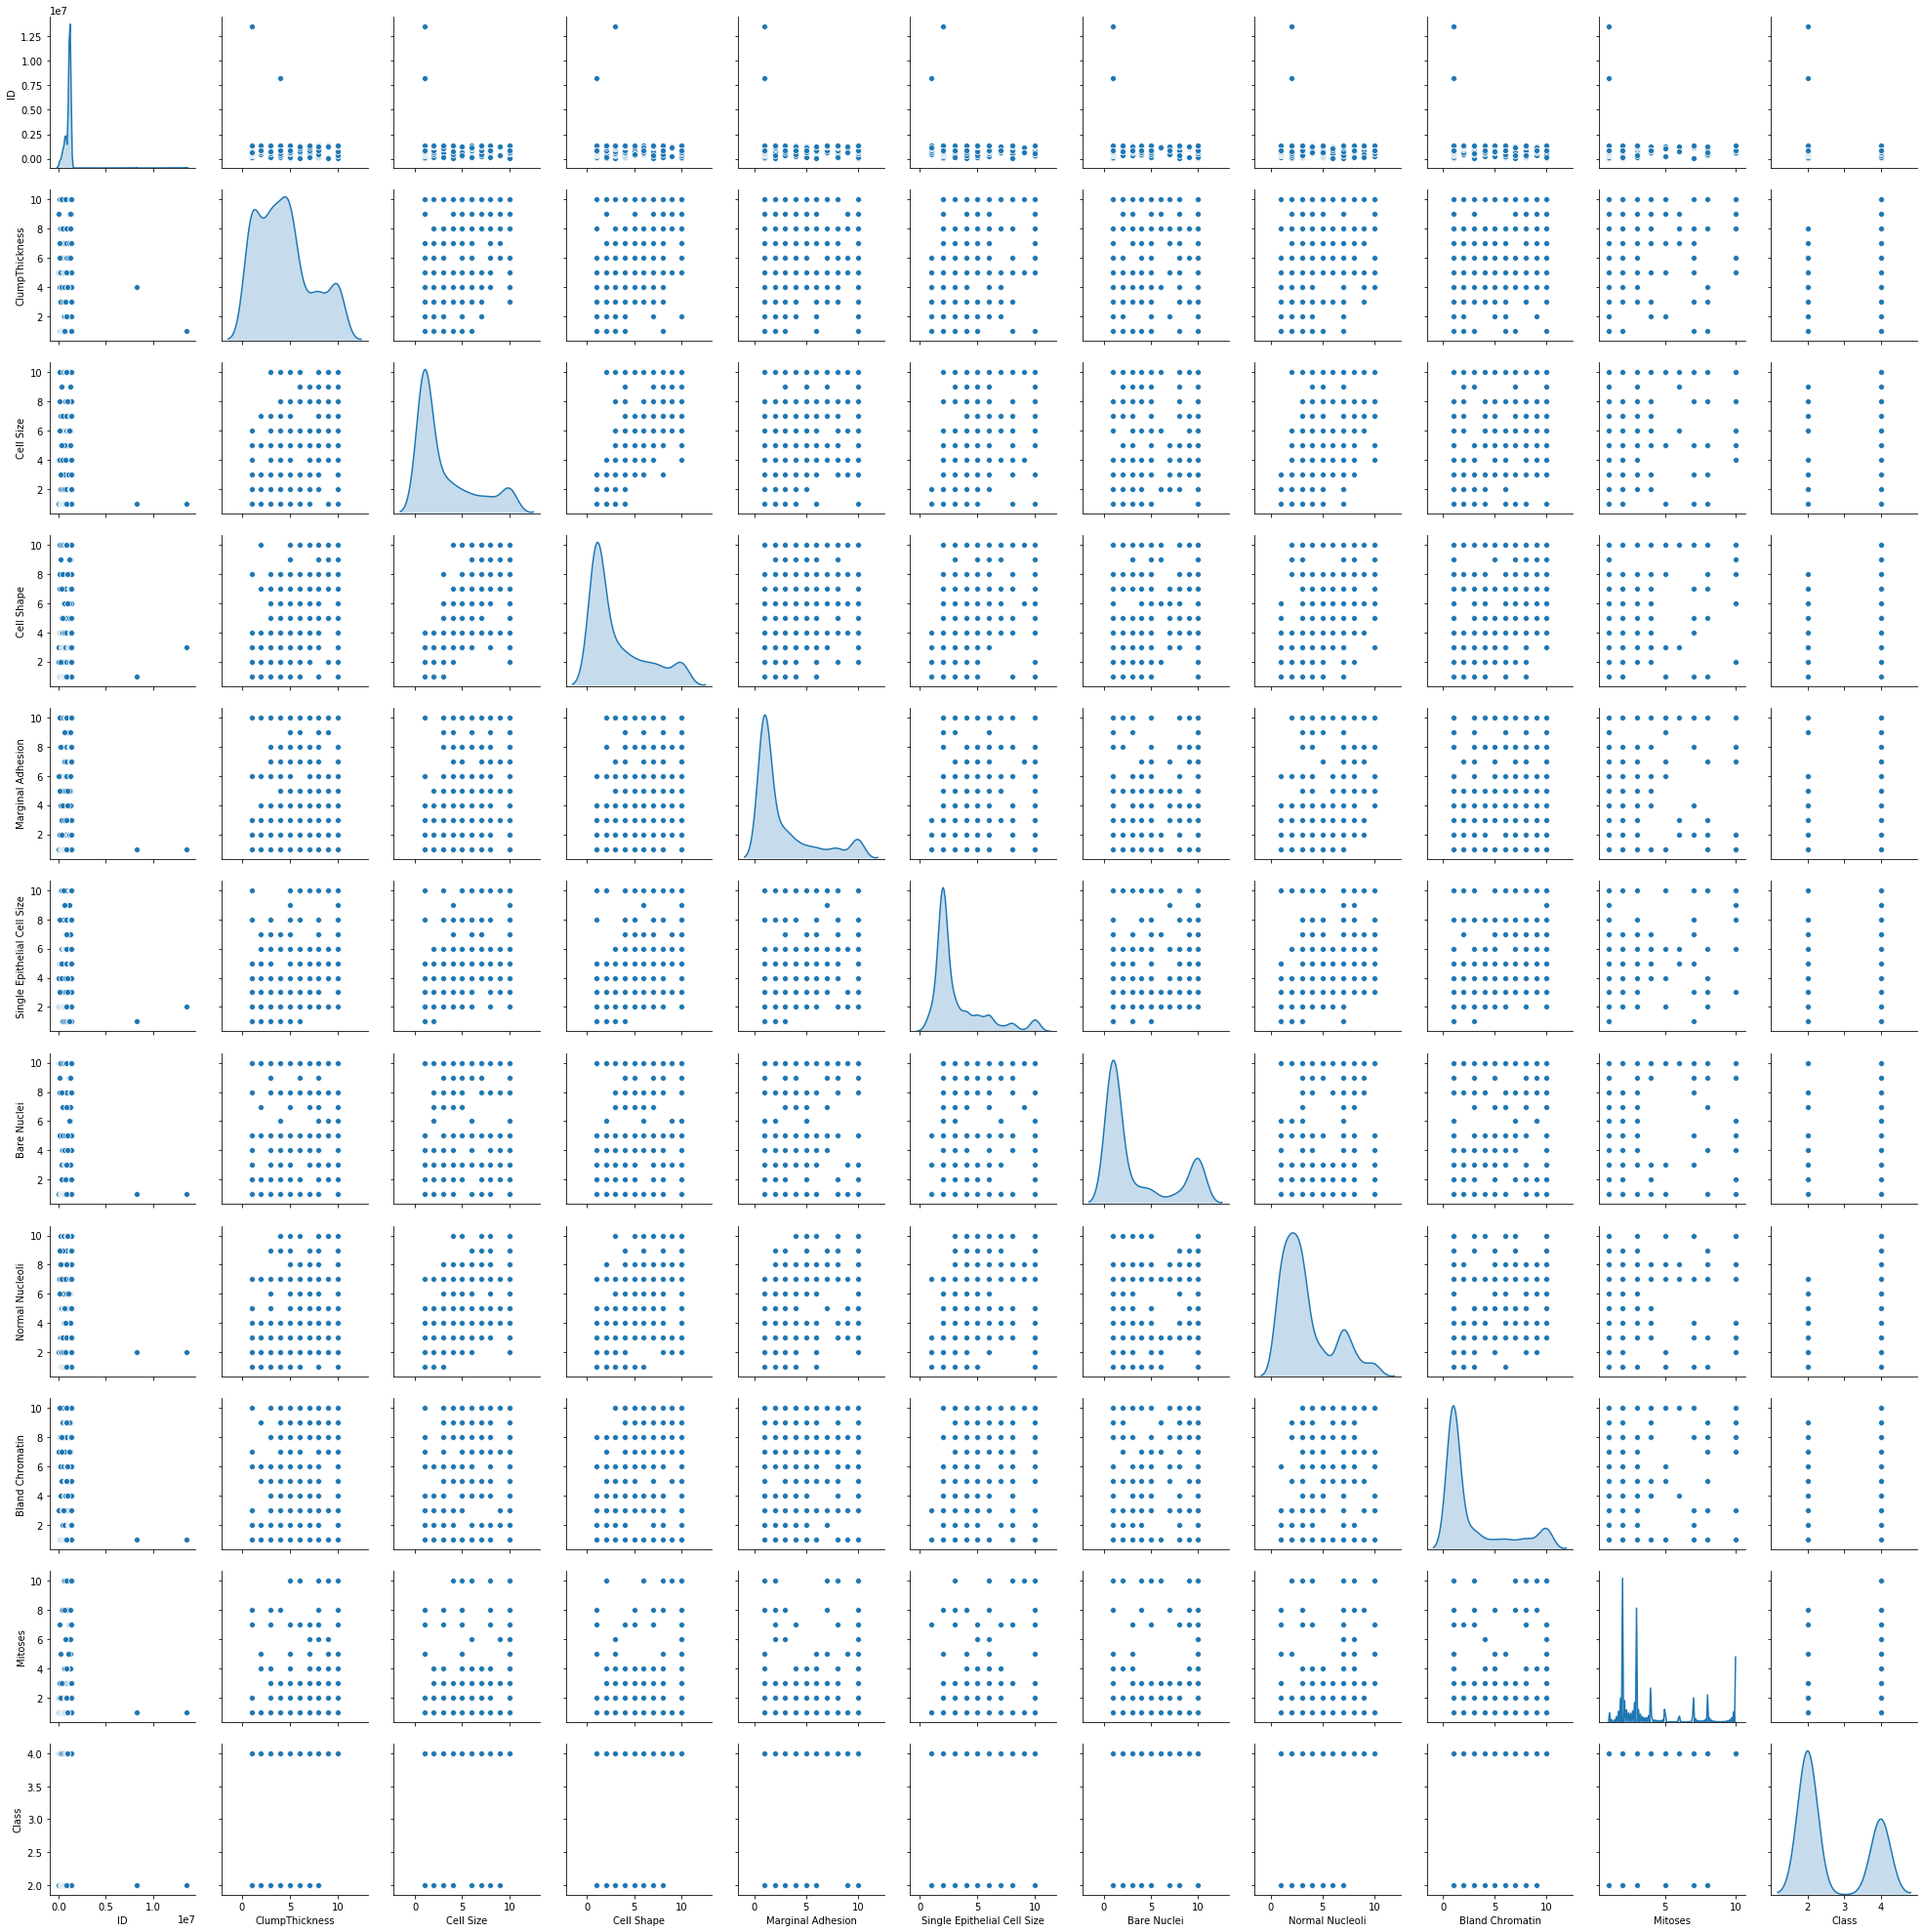

In [25]:
#Let us check for pair plots
sns.pairplot(cancer_df, diag_kind="kde")

In [26]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [27]:
# We could see most of the outliers are now removed.

In [28]:
cancer_df[cancer_df.duplicated()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [29]:
cancer_df.drop_duplicates(inplace=True)

In [30]:
cancer_df.shape

(690, 11)

In [31]:
# Drop ID column
cancer_df.drop(labels="ID",inplace=True,axis=1)

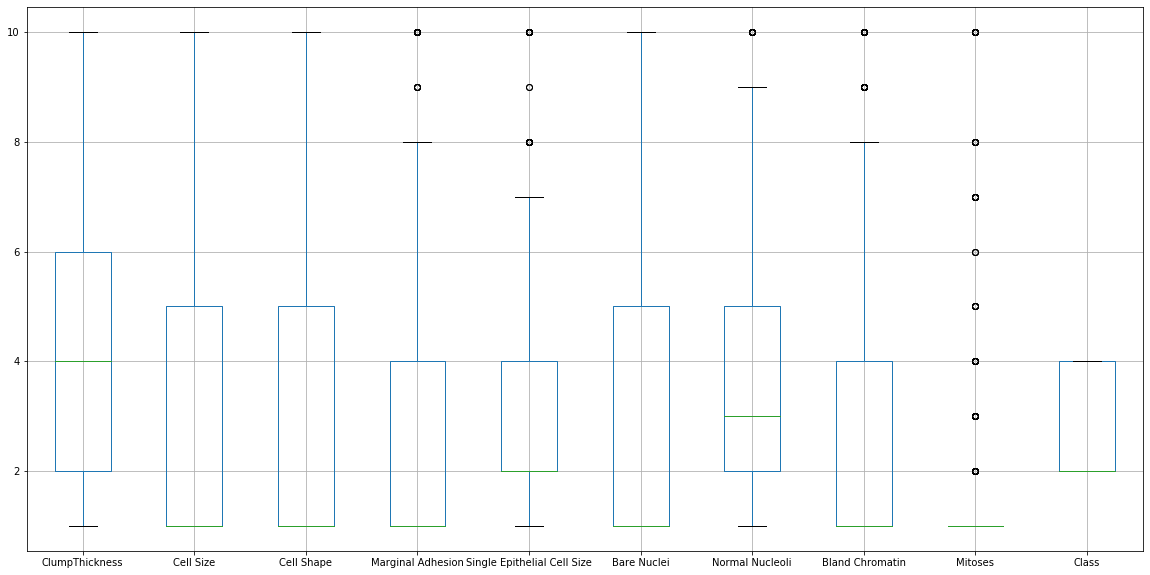

In [32]:
plt.figure(figsize=(20,10))
cancer_df.boxplot()

In [33]:
Q1 = cancer_df.quantile(0.25)
Q3 = cancer_df.quantile(0.75)
IQR = Q3 - Q1
for col in cancer_df.columns:
    cancer_o = cancer_df[(cancer_df[col] < (Q1[col] - 1.5*IQR[col])) | (cancer_df[col] > (Q3[col] + 1.5*IQR[col]))]
    if len(cancer_o) > 0:
        print("Outlier is present in: {}".format(col))
        cancer_df[col] = np.where(cancer_df[col] > (np.quantile(cancer_df[col], 0.75)), np.quantile(cancer_df[col], 0.75),  cancer_df[col])

Outlier is present in: Marginal Adhesion
Outlier is present in: Single Epithelial Cell Size
Outlier is present in: Normal Nucleoli
Outlier is present in: Bland Chromatin
Outlier is present in: Mitoses


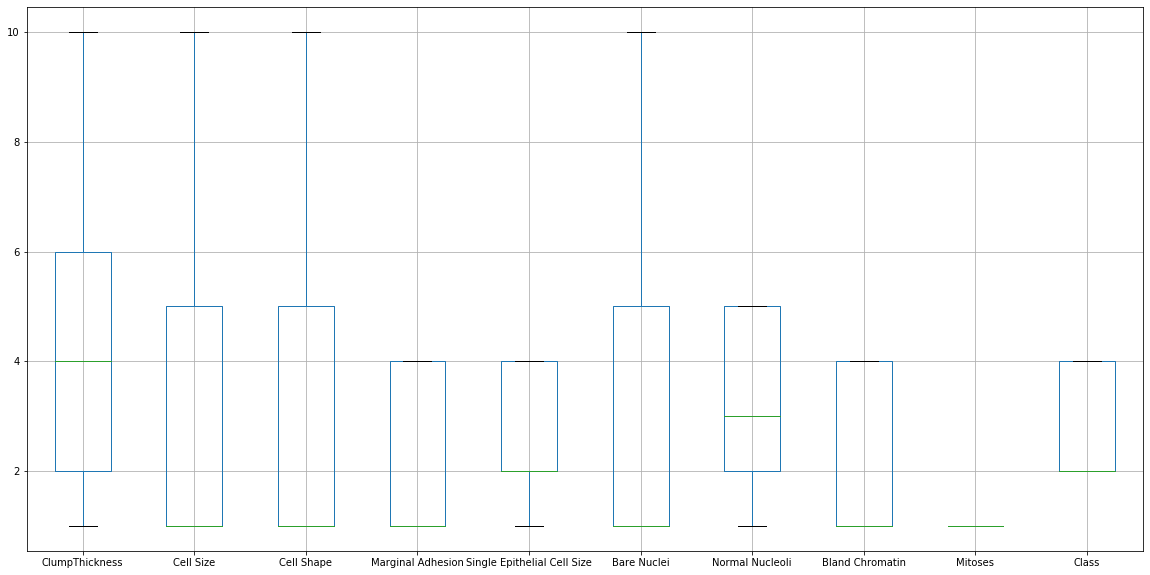

In [34]:
# Boxplot after removing outlier
plt.figure(figsize=(20,10))
cancer_df.boxplot()

In [35]:
cancer_df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [36]:
pd.crosstab(cancer_df["ClumpThickness"], cancer_df["Class"])

Class,2,4
ClumpThickness,,
1,139,3
2,46,4
3,94,11
4,68,12
5,84,45
6,16,17
7,1,22
8,4,42
9,0,13


In [37]:
pd.crosstab(cancer_df["Cell Size"], cancer_df["Class"])

Class,2,4
Cell Size,,
1,374,4
2,37,8
3,27,24
4,9,31
5,0,30
6,2,25
7,1,18
8,1,28
9,1,5


In [38]:
pd.crosstab(cancer_df["Cell Shape"], cancer_df["Class"])

Class,2,4
Cell Shape,,
1,345,2
2,52,7
3,33,23
4,13,31
5,3,30
6,3,27
7,2,28
8,1,27
9,0,7


In [39]:
pd.crosstab(cancer_df['Marginal Adhesion'], cancer_df["Class"])

Class,2,4
Marginal Adhesion,,
1.0,369,31
2.0,37,19
3.0,31,27
4.0,15,161


In [40]:
pd.crosstab(cancer_df['Single Epithelial Cell Size'], cancer_df["Class"])

Class,2,4
Single Epithelial Cell Size,,
1.0,44,1
2.0,359,23
3.0,29,42
4.0,20,172


In [41]:
pd.crosstab(cancer_df['Bare Nuclei'], cancer_df["Class"])

Class,2,4
Bare Nuclei,,
1,395,17
2,21,9
3,14,14
4,6,13
5,10,20
6,0,4
7,1,7
8,2,18
9,0,9


In [42]:
pd.crosstab(cancer_df['Normal Nucleoli'], cancer_df["Class"])

Class,2,4
Normal Nucleoli,,
1.0,149,2
2.0,158,7
3.0,125,35
4.0,8,32
5.0,12,162


In [43]:
pd.crosstab(cancer_df['Bland Chromatin'], cancer_df["Class"])

Class,2,4
Bland Chromatin,,
1.0,396,40
2.0,30,6
3.0,12,30
4.0,14,162


In [44]:
pd.crosstab(cancer_df['Mitoses'], cancer_df["Class"])

Class,2,4
Mitoses,,
1.0,452,238


# Q6 Create a covariance matrix for identifying Principal components

In [45]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.model_selection import train_test_split

In [46]:
X = cancer_df.drop(labels="Class", axis=1)

In [47]:
Y = cancer_df["Class"]

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [49]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00145138 0.64410677 0.65453792 0.55329897 0.58388619 0.59150555
  0.5762575  0.57214901 0.        ]
 [0.64410677 1.00145138 0.9066632  0.72204998 0.77320789 0.68556472
  0.71799205 0.72684553 0.        ]
 [0.65453792 0.9066632  1.00145138 0.7042574  0.75066888 0.70518656
  0.7033365  0.71910723 0.        ]
 [0.55329897 0.72204998 0.7042574  1.00145138 0.6955125  0.69693138
  0.65110177 0.65326018 0.        ]
 [0.58388619 0.77320789 0.75066888 0.6955125  1.00145138 0.68280195
  0.67626384 0.72360753 0.        ]
 [0.59150555 0.68556472 0.70518656 0.69693138 0.68280195 1.00145138
  0.6894512  0.64168219 0.        ]
 [0.5762575  0.71799205 0.7033365  0.65110177 0.67626384 0.6894512
  1.00145138 0.68697604 0.        ]
 [0.57214901 0.72684553 0.71910723 0.65326018 0.72360753 0.64168219
  0.68697604 1.00145138 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [50]:
# Step 2- Get eigen values and eigen vector

In [51]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[ 0.31342808 -0.01445005  0.9124381   0.09860965  0.09082558 -0.0962776
   0.2022549   0.0293459   0.        ]
 [ 0.37937489 -0.72286891 -0.00583774 -0.36645941 -0.1142357  -0.02238539
  -0.35942354 -0.23763936  0.        ]
 [ 0.37726214  0.67979274  0.04498987 -0.32808981 -0.24972764  0.07025765
  -0.39784839 -0.2455702   0.        ]
 [ 0.34707615  0.04585818 -0.26752061  0.34722116  0.01102493 -0.59001151
   0.29016231 -0.50286784  0.        ]
 [ 0.36075167  0.06607829 -0.18881161 -0.21977369  0.7409318   0.390892
   0.2699902  -0.08288783  0.        ]
 [ 0.34766101 -0.08247825 -0.0846144   0.65544286 -0.27764678  0.59409238
  -0.07281375 -0.01512907  0.        ]
 [ 0.34846791  0.04202771 -0.13392983  0.21603513  0.27651374 -0.36232963
  -0.42887293  0.64847576  0.        ]
 [ 0.35015585 -0.00976042 -0.18189189 -0.32124942 -0.46226395 -0.01243881
   0.57035219  0.44929441  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.

# Q8 Find variance and cumulative variance by each eigen vector

In [52]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 72.26578688  78.42013919  83.5020554   88.07803795  92.08571935
  95.65989817  98.85793068 100.         100.        ]


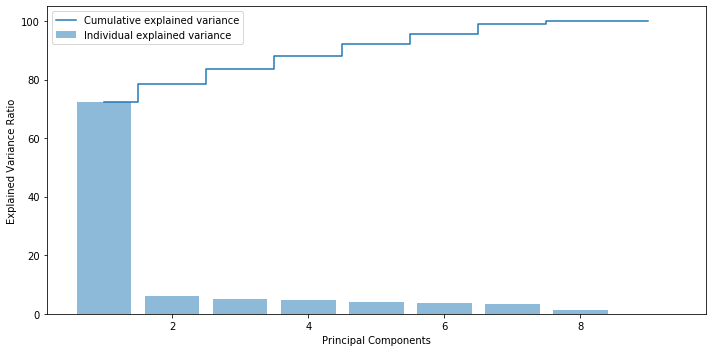

In [53]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [54]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
X_pca = pca.transform(X_std)
X_pca.shape

(690, 9)

In [57]:
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3,4,5,6,7,8
0,-1.440785,-0.659606,-0.183040,0.538014,0.196762,-0.263288,0.363268,0.011847,0.0
1,2.000942,0.660814,-1.221590,-0.974160,-0.531446,0.703103,0.516113,0.005501,0.0
2,-1.567256,0.011995,-0.294328,0.512981,0.360588,-0.030527,0.221930,0.024401,0.0
3,1.903097,-0.393112,1.823166,0.352645,0.365196,0.687508,-0.980380,0.095283,0.0
4,-1.017176,0.076811,-0.683175,-0.247464,-0.178616,-1.138457,0.348000,-0.063965,0.0


In [58]:
pca.components_

array([[ 0.31342808,  0.37937489,  0.37726214,  0.34707615,  0.36075167,
         0.34766101,  0.34846791,  0.35015585, -0.        ],
       [-0.9124381 ,  0.00583774, -0.04498987,  0.26752061,  0.18881161,
         0.0846144 ,  0.13392983,  0.18189189,  0.        ],
       [-0.09860965,  0.36645941,  0.32808981, -0.34722116,  0.21977369,
        -0.65544286, -0.21603513,  0.32124942, -0.        ],
       [ 0.0293459 , -0.23763936, -0.2455702 , -0.50286784, -0.08288783,
        -0.01512907,  0.64847576,  0.44929441,  0.        ],
       [-0.2022549 ,  0.35942354,  0.39784839, -0.29016231, -0.2699902 ,
         0.07281375,  0.42887293, -0.57035219,  0.        ],
       [-0.0962776 , -0.02238539,  0.07025765, -0.59001151,  0.390892  ,
         0.59409238, -0.36232963, -0.01243881,  0.        ],
       [ 0.09082558, -0.1142357 , -0.24972764,  0.01102493,  0.7409318 ,
        -0.27764678,  0.27651374, -0.46226395,  0.        ],
       [ 0.01445005,  0.72286891, -0.67979274, -0.04585818, -0

In [59]:
pca.explained_variance_ratio_

array([0.72265787, 0.06154352, 0.05081916, 0.04575983, 0.04007681,
       0.03574179, 0.03198033, 0.01142069, 0.        ])

In [60]:
pca.explained_variance_

array([5.78965375, 0.49306277, 0.40714336, 0.36660992, 0.32107985,
       0.2863493 , 0.25621392, 0.09149815, 0.        ])

# Q10 Find correlation between components and features

In [61]:
pca_7 = PCA(n_components=7)
pca_7.fit_transform(X_std)

array([[-1.44078507, -0.65960589, -0.18303969, ...,  0.19676234,
        -0.26328805,  0.36326822],
       [ 2.00094224,  0.66081393, -1.22159029, ..., -0.53144566,
         0.7031031 ,  0.51611327],
       [-1.56725611,  0.01199547, -0.29432789, ...,  0.36058839,
        -0.03052666,  0.22193025],
       ...,
       [ 3.5828986 ,  0.67123071,  1.90191265, ...,  0.7773328 ,
        -0.40565876, -0.01809847],
       [ 2.70115034,  1.08588999,  0.57525588, ...,  0.15165187,
        -1.14779145, -0.47501578],
       [ 3.42682433,  1.27487882,  0.84382578, ...,  0.16047598,
        -0.53017822,  0.04846297]])

In [62]:
pca_7

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [63]:
pca_7.explained_variance_

array([5.78965375, 0.49306277, 0.40714336, 0.36660992, 0.32107985,
       0.2863493 , 0.25621392])

In [64]:
pca_7.components_

array([[ 0.31342808,  0.37937489,  0.37726214,  0.34707615,  0.36075167,
         0.34766101,  0.34846791,  0.35015585, -0.        ],
       [-0.9124381 ,  0.00583774, -0.04498987,  0.26752061,  0.18881161,
         0.0846144 ,  0.13392983,  0.18189189,  0.        ],
       [-0.09860965,  0.36645941,  0.32808981, -0.34722116,  0.21977369,
        -0.65544286, -0.21603513,  0.32124942, -0.        ],
       [ 0.0293459 , -0.23763936, -0.2455702 , -0.50286784, -0.08288783,
        -0.01512907,  0.64847576,  0.44929441,  0.        ],
       [-0.2022549 ,  0.35942354,  0.39784839, -0.29016231, -0.2699902 ,
         0.07281375,  0.42887293, -0.57035219,  0.        ],
       [-0.0962776 , -0.02238539,  0.07025765, -0.59001151,  0.390892  ,
         0.59409238, -0.36232963, -0.01243881, -0.        ],
       [ 0.09082558, -0.1142357 , -0.24972764,  0.01102493,  0.7409318 ,
        -0.27764678,  0.27651374, -0.46226395,  0.        ]])

In [65]:
cov_matrix = np.cov(X_std.T)

In [66]:
eigval, eigenvec = np.linalg.eig(cov_matrix)

In [67]:
df_comp = pd.DataFrame(pca_7.components_, columns=list(X.columns))

In [68]:
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.313428,0.379375,0.377262,0.347076,0.360752,0.347661,0.348468,0.350156,-0.0
1,-0.912438,0.005838,-0.044990,0.267521,0.188812,0.084614,0.133930,0.181892,0.0
2,-0.098610,0.366459,0.328090,-0.347221,0.219774,-0.655443,-0.216035,0.321249,-0.0
3,0.029346,-0.237639,-0.245570,-0.502868,-0.082888,-0.015129,0.648476,0.449294,0.0
4,-0.202255,0.359424,0.397848,-0.290162,-0.269990,0.072814,0.428873,-0.570352,0.0


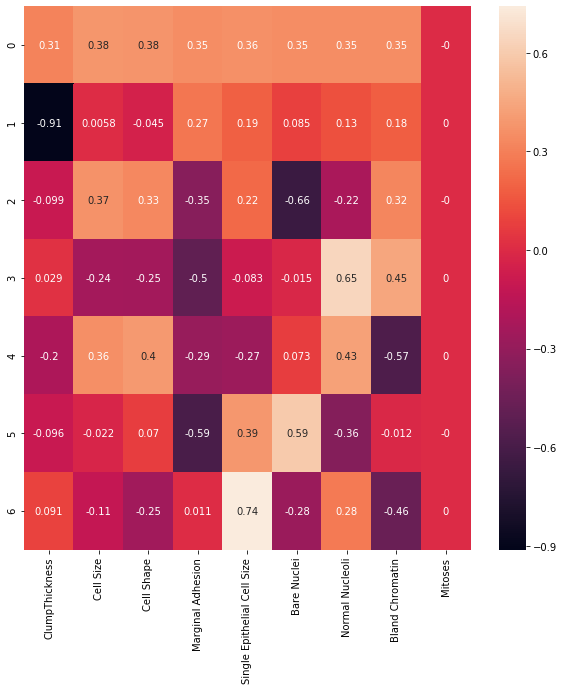

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(df_comp, annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [70]:
rating_df = pd.read_csv("jokes.csv")
rating_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [71]:
rating_df = rating_df.head(200)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [72]:
rating_df.replace(to_replace=99.00, value=0,inplace=True)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [73]:
rating_df.columns

Index(['NumJokes', 'Joke1', 'Joke2', 'Joke3', 'Joke4', 'Joke5', 'Joke6',
       'Joke7', 'Joke8', 'Joke9',
       ...
       'Joke91', 'Joke92', 'Joke93', 'Joke94', 'Joke95', 'Joke96', 'Joke97',
       'Joke98', 'Joke99', 'Joke100'],
      dtype='object', length=101)

In [74]:
rating_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [75]:
rating_df.shape

(200, 101)

In [76]:
rating_df.drop(labels="NumJokes", axis=1,inplace=True)

In [77]:
rating_mean = pd.DataFrame(rating_df.mean())

In [78]:
top10_jokes = rating_mean.sort_values(0,ascending=False)

# Top10 jokes
print("----Top 10 Jokes")
top10_jokes.head(10)

----Top 10 Jokes


,0
Joke50,4.05540
Joke36,3.61150
Joke53,3.57150
Joke35,3.22315
Joke29,3.18995
Joke27,3.05240
Joke62,2.86185
Joke49,2.85000
Joke32,2.77955
Joke31,2.65710
